![header](https://i.imgur.com/I4ake6d.jpg)


# Copernicus Marine Sea Level America Training (2/2)

<div style="text-align: right"><i> 08-02-SEALEVEL-Part-two-out-of-two </i></div>

***

# How to quickly plot Copernicus Sea Level Satellite Observations data ?

<img src="./img/08-SL-01_ProductLevelPrez-2.png" width="900">


***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***


# Table of contents
***
- [1. Introduction](#1.-Introduction)
  - Environment Setup
- [2. Test with one file](#2.-Test-with-one-file)
  - Explanation
- [3. Explore the data](#3.-Explore-the-data)
  - [3.1. Load L3 Product through xarray](#3.1.-Load-L3-Product-through-xarray)
  - [3.2. Examine L3 Product Metadata](#3.2.-Examine-L3-Product-Metadata)
- [4. Satellite cycles, tracks and orbits](#4.-Satellite-cycles,-tracks-and-orbits)
  - [4.1. Select a "track"](#4.1.-Select-a-"track")
  - [4.2. Geographically subset the data](#4.2.-Geographically-subset-the-data)
- [5. Dealing with several files together](#5.-Dealing-with-several-files-together)
  

## 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

We will focus on the following product (available on the [Copernicus Catalogue](http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&task=results)):
- [SEALEVEL_GLO_PHY_L3_NRT_OBSERVATIONS_008_044](http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&view=details&product_id=SEALEVEL_GLO_PHY_L3_NRT_OBSERVATIONS_008_044)

Those data are coming from radar altimetry satellites (plural), and are providing with the height of the sea surface with respect to different references. This is a slightly rawer product than previously, still highly processed and validated. The particularity is that it has a different `Processing Level`:

<div class="alert alert-block alert-success">
<b>Specificities</b>

***  
- `Level3`: along-track, mono sensor with gaps after validation process, Georeferenced data.
</div>


To read more about the processing, you can see [<a href="./docs/References/os-12-1067-2016.pdf" target="_blank">Pujol et al, 2016</a>] and [<a href="./docs/References/os-15-1207-2019.pdf" target="_blank">Taburet et al, 2019</a>] in the docs/references.

<hr width='50%'>

We will look at the area west of central America with eddies shed.

<hr>

### Environment Setup

At first, let's setup the notebook with all the necessary tools available from the Jupyter Notebook Ecosystem.

#### Importing modules
* Unlike MATLAB, Python libraries need to be `imported` before they can be used
* Imported libraries often have a short name ("namespace")  (not mandatory, though; you'll most often find xarray shortened as xr and numpy as np. For lisibility we choose not to, except for matplotlib.pyplot and cartopy.crs, a bit long)
* Portions of libraries can be imported

In [2]:
%matplotlib inline
import os                         # Import os, sys (operating system interface (manage paths, create dirs,...)
import glob                       # Unix-style pathname pattern; enables to list files using a wildcard *
import xarray                     # Import xarray (python interface to manipulate multidimensional data)
import numpy                      # Import the mathematical library numpy
import matplotlib                 # Import a plotting library
import matplotlib.pyplot as plt   # Define the namespace for the plots
plt.rcParams["figure.figsize"] = (14,8) #define the size of the figures in the whole notebook
import cartopy                    # Import the mapping library (note: this is needed to deal with mapping projections)
import cartopy.crs as ccrs        #  Define the namespace for the geographical projections
# The following is not usually recommended, but avoid un-necessary warning messages in today's training frame
import warnings
warnings.filterwarnings('ignore')

In [3]:
# define the folder where the data were stored. 
rootPath = 'data/'
# we are again using the same date (any other would have done)
mydate = '2021-04-13'
# we will begin with the full Global area
lon_min=-180 ; lon_max=180.; lat_min=-90. ; lat_max=90.

## 2. Test with one file

[Go back to the "Table of contents"](#Table-of-contents)

We will start by plotting very roughly the data, then I'll explain more.

If you look into the data/ folder, you will see five files named nrt_global_xxx_phy_l3_20210413_20210420.nc, with only xxx different depending on the files.
We took them on 2021/04/20 (second date in the file name) but most of those files were available as soon as 2014/04/13 (first date in the file name, i.e., the day the measurements were done). 

We will plot the data in a "plate carree" projection (scale: longitude = latitude), see https://scitools.org.uk/cartopy/docs/latest/crs/projections.html. It is not the most elegant or sophisticated projection, but it is quite easy to interpret.

We are letting the color scale minimum and maximum as they are automatically (i.e. the minimum and maximum of the variable within the file).
The lands are colored in grey (lightgrey), with a 1-px line around them. 
we set the extend of the plot using the longitude and latitude minimum and maximum defined above. 
We add a color scale (colorbar), and a title; here we put the unit of the scale in the title, in a 16-size font.

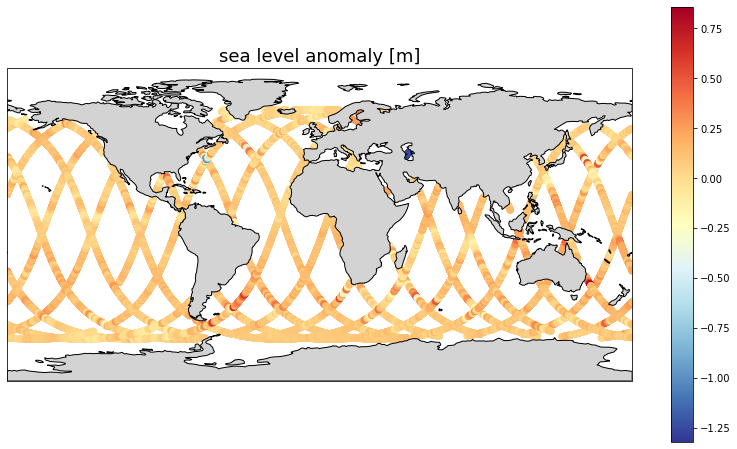

In [6]:
#define the file in the data folder we are going to work with
MyInputFileJ3 = 'nrt_global_j3_phy_l3_20210413_20210420.nc'
mydatasetJ3 = xarray.open_dataset(rootPath + MyInputFileJ3)

#first we plot only one file
latJ3 = mydatasetJ3['latitude']
lonJ3 = mydatasetJ3['longitude']
slaJ3 = mydatasetJ3['sla_filtered']
mydatasetJ3.close()

# Create python object from the "matplotlib" and its "pyplot" package (shortened as plt)
plt.figure()
# Create an "ax" from which we add the projection
ax = plt.axes(projection=ccrs.PlateCarree())
# Add a layer for the continent
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
# Set the extent of the map
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
# This time, we will not plot a colormesh, but a "scatter" plot
tracks = ax.scatter(lonJ3, latJ3, c=slaJ3, cmap='RdYlBu_r')
# Add a colorbar to the map object to give scale
cbar = plt.colorbar(tracks)
# Add a title to the map object
plt.title('sea level anomaly [m]', size=18)
plt.show()

What do you think of this map?<br>
Try with some of the five other files (with al, s3a, c2n, s3b, h2b instead of j3 in the file name).<br>
Do you see eddies in our area west of central america ? -- you can define the color minimum and maximum as in the previous notebook.

<div class="alert alert-block alert-info">

## Explanation

The point here was to, quickly and without further code complexity, show you what the data are looking like. 
At the end of the 08-SEALEVEL-01_sealevel_grids_plotting.ipynb notebook, we saw lines on the error map. I hinted that they were linked to the satellites' measurements. 
This is the time when you must learn the truth: the sea level from satellite altimetry data are not the nicely filled gap-free images we've been using in the previous notebook. The map above is more like it. 
The altimetry technique is measuring the height of the satellite with respect to the surface just beneath itself (nadir) (for now). 10 km left or right, there won't be any measurement, thus the lines which correspond to the projection on Earth of the satellite's orbit above us. 
The blank areas on the above map are not exagerated (quite the contrary), and they are areas without measurements on that day from that satellite.

On April 20, 2021, 6 satellites were processed for the SEALEVEL_EUR_PHY_L3_NRT_OBSERVATIONS_008_059 product:
Cryosat2 (aka C2n), Jason-3 (J3), Sentinel-3A (S3A), Sentinel-3B (S3B), Saral (al) and HY-2B. This list is changing along time, and potentially all the time (e.g. Sentinel-6A should join soon, replacing Jason-3; HY-2C is also under calibration ; currently functionning satellites can have momentary gaps, old ones can stop, new ones are added as soon as possible whenever they are declared operational).

Note that the grids we used previously are made from all of these, but with much more than one day of measurement used. 


The `Level3 product SEALEVEL_GLO_PHY_L3_NRT_OBSERVATIONS_008_044` holds as many datasets as altimeters having measured during the whole time period the data is available, plus some when a satellite is shifted on a new orbit. Some more are in the REP equivalent dataset, which includes data starting on Jan. 1993.


## 3. Explore the data

[Go back to the "Table of contents"](#Table-of-contents)

### 3.1. Load L3 Product through `xarray`

For the L3 Product, we have used the same method presented for L4 Product to read the SeaLevel NetCDF data using xarray.open_dataset

### 3.2. Examine L3 Product Metadata
[Go back to the "Table of contents"](#Table-of-contents)

In [7]:
#we define here one of the satellites for the tests; you could try another one (by its short name)
sat = 'j3' # possible choice for this date: j3 s3a s3b c2n al or h2b

MyInputFile = 'nrt_global_'+sat+'_phy_l3_20210413_20210420.nc'
mydataset = xarray.open_dataset(rootPath + MyInputFile)

# Load the data for longitude, latitude and sea level anomaly
latitude = mydataset['latitude']
longitude = mydataset['longitude']
ATSeaLevelAnomaly = mydataset['sla_filtered']

print(f'The variables available in this L3 along-track product are:\n {mydataset.data_vars}\
\n The shape of the along-track SeaLevelAnomalyFiltered, Latitude and Longitude are respectively:\n {ATSeaLevelAnomaly.shape}, {latitude.shape}, {longitude.shape} \
\n The size (number of gridpoints) of the along-track SeaLevelAnomalyFiltered, Latitude and Longitude are respectively:\n {ATSeaLevelAnomaly.size}, {latitude.size}, {longitude.size}')

The variables available in this L3 along-track product are:
 Data variables:
    cycle           (time) int16 ...
    track           (time) int16 ...
    dac             (time) float32 ...
    flag            (time) float32 ...
    lwe             (time) float32 ...
    mdt             (time) float32 ...
    ocean_tide      (time) float64 ...
    sla_filtered    (time) float32 ...
    sla_unfiltered  (time) float32 ...
 The shape of the along-track SeaLevelAnomalyFiltered, Latitude and Longitude are respectively:
 (54258,), (54258,), (54258,) 
 The size (number of gridpoints) of the along-track SeaLevelAnomalyFiltered, Latitude and Longitude are respectively:
 54258, 54258, 54258


<div class="alert alert-block alert-info">
<b>NOTE</b>

***
You will notice that the dimension now is time, and only time, for every variable listed. 
    
</div> 
The sizes are the same for the sea level anomaly, the latitude and the longitude. Those data are registered with respect to time. 

We also have a number of new variables in the list:
- ocean-related variables: <b>sla_filtered</b> and <b>sla_unfiltered</b> 
  but also <b>dac</b> (Dynamic Atmospheric Correction), <b>mdt</b> (Mean Dynamic Topography) and <b>ocean_tide</b>
- processing related variables: <b>lwe</b> (long wavelength error) and <b>flag</b>
- AND we also have satellite-related variables as integer: <b>cycle</b> and <b>track</b>. 

## 4. Satellite cycles, tracks and orbits

[Go back to the "Table of contents"](#Table-of-contents)

A satellite is going around the Earth at a given altitude, with a given inclination. In the meantime, the Earth is rotating. This draws a mesh of measurements over the Earth surface.

<img src="./img/orbit_credits.gif">

The animation show the first 5 days of measurements (the red lines) of Topex/Poseidon satellite (the orange dot -- It would be the same today with Jason-3 and also Sentinel-6A), in a 3D view of the satellite and Earth (top), and projected on a planisphere (bottom). 

Depending on the altitude and inclination, the measurements are done every N days over the exact same points. 

A cycle is the time necessary for the satellite to measure over the same point. <br>
For altimetry satellites, you find 10-day cycles, 28 to 35 days cycles and long-period (or geodetic) cycles, lasting one year or more. For practical purposes, cycles are numbered, from 1 to ... (whatever is the number when it stops). 

A track is half the turn around Earth. For practical purposes, tracks are numbered. The longer the cycle, the higher the track numbers. The same track number will always be at the same place if the satellite's orbit was not changed in the meantime. Note that this is usually the case of the Jason series of satellite : first it is on the historical orbit; then when a follow-on is launched it is shifted to a new ("n") orbit so as to provide measurements in between its previous tracks; then if it is still functionning but may falter, it may be put on a geodetic orbit ("g"). 

### 4.1. Select a "track"
[Go back to the "Table of contents"](#Table-of-contents)

In [8]:
#we zoom in on the  ??? again
lon_min=-120. ; lon_max=-75. ; lat_min=5. ; lat_max=20.

# selecting data based on track number
# list the track numbers present in the file
# for Jason-3, the numbers will start at 1 and end up at 254
# for a global map, you'll have an uninterrupted series of numbers. 
# for a regional map or a subset, you can have missing numbers since those won't be over your area.
print('available track numbers in the file are', numpy.unique(mydataset['track'].values))


available track numbers in the file are [193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218]


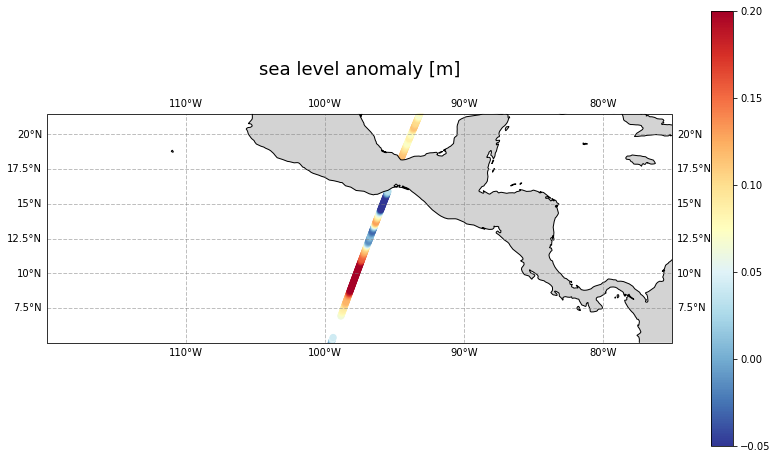

In [9]:
# track number to be selected (we choose a specific one, using the list generated above and kml files 
# with the track numbers)
tracknumber=193 #206
# we use .sel as for time (day) in the grids.
# however, we keep all the variables over the given track (especially longitude and latitude, which are
# not dimensions here) so the syntax is slightly different. 
subsetByTrack = mydataset.sel(time=(mydataset.track==tracknumber))
# we will be using only the subset from now on, so we close the complete file. 
mydataset.close()

plt.figure()
# plot the track on the map
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
# we will display the longitudes and latitudes on a grid on the map, so as to better locate features
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
# continents, as previously
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
# actually plot the data; we use the same min/max than in the notebooks on plotting grids
tracks = ax.scatter(subsetByTrack['longitude'], 
            subsetByTrack['latitude'], c=subsetByTrack['sla_filtered'], vmin=-0.05, vmax=0.2, cmap='RdYlBu_r')
cbar = plt.colorbar(tracks)
# the grid's labels are all around the plot; we are putting a little more space between the title and it (pad)
plt.title('sea level anomaly [m]', size=18, pad=24)
plt.show()
#we save the result in a file; we use the satellite name and also the track number (converted as a string while it is natively an integer)
subsetByTrack.to_netcdf('data/'+sat+'track'+str(tracknumber)+'.nc')


This line of measurements can also be plotted as SeaLevelAnomaly vs time, or vs latitude (when you have only one track for the latter). We will plot it vs latitude so as to better localize the features seen on the plot and relate them to what you can see on the map. You can try it vs time, to compare.

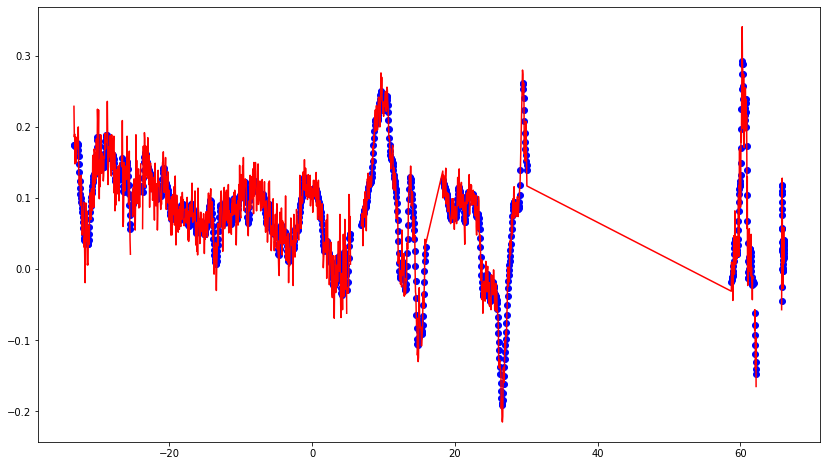

In [15]:
# we do a simple plot over our subset, with blue dots (b for blue, o for dot) for sla_filtered
# and a red line for another variable, sla_unfiltered
plt.figure()
plt.plot(subsetByTrack['latitude'], subsetByTrack['sla_filtered'], 'bo')
plt.plot(subsetByTrack['latitude'], subsetByTrack['sla_unfiltered'], c='red')

plt.show()

We overlaid here the sea level anomalies filtered in blue dots and "unfiltered" (red line). The unfiltered is more "noisy" but in this noise there may be some oceanographic small-scale signal. The filtered is much smoother, but miss those features. 
Note that we have here the full track over the whole Earth, not a subset over the Eastern Tropical Pacific. The blank areas are over continents (there is a large part over North America here, a smaller one over central America around 17°N -- straight red lines).

<div class="alert alert-block alert-success">
<b>Challenge</b>

***  
What do you think of the very high peak/trough on the curve between ~7 and 17°N? Relate it with the above map.
</div>  
 

### 4.2. Geographically subset the data
[Go back to the "Table of contents"](#Table-of-contents)

One of the questions users often have on such data is "since the data are registered by time, how to geographically subset them?". We will be using .sel again to select.<br>
Here is a way of doing that geographical subsetting. 

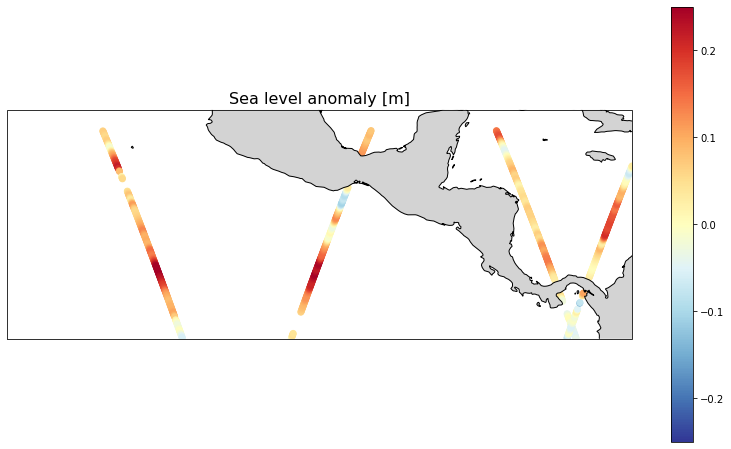

In [10]:
# selecting data based on and area of interest
# we go back to our area west of central America.
lon_min=-120. ; lon_max=-75. ; lat_min=5. ; lat_max=20.

# we re-open the global file; you can try with other satellites than Jason-3
# possible choice of satellite at this date: j3 s3a s3b c2n al or h2b
sat='j3' 
MyInputFile = 'nrt_global_'+sat+'_phy_l3_20210413_20210420.nc'
mydataset = xarray.open_dataset(rootPath + MyInputFile)
# we need to load latitude and longitude to use them in the selection below
latitude = mydataset['latitude']
longitude = mydataset['longitude']

# Select a specific area and save it in a file
subsetArea = mydataset.sel(time=((longitude > lon_min) & (longitude < lon_max) & (latitude > lat_min) & (latitude < lat_max)))
# we save the subset into a file (optional here, but can be useful)
subsetArea.to_netcdf(rootPath + 'Subset_AT_Pac.nc')
# from now on, we won't be using the whole dataset again, so we close it. 
# We will continue on using the subset. 
mydataset.close()

# we use the subset directly since it is not closed. We could have closed it (subsetArea.close() ) 
# and opened the saved file again.
latitude = subsetArea['latitude']
longitude = subsetArea['longitude']
ATSeaLevelAnomaly = subsetArea['sla_filtered']

plt.figure()
# plot with high-resolution lands to better see the coasts.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
# actually plot the data; we can use the same min/max than for the grid over the same area. 
tracks = ax.scatter(longitude, latitude, c=ATSeaLevelAnomaly, vmin=-0.25, vmax=0.25, cmap='RdYlBu_r')
plt.colorbar(tracks)
plt.title('Sea level anomaly [m]', size=16)
plt.show()

The variable (sea level anomaly) is the same than in previous notebooks. So is its oceanographic interpretation is the same: the high and low values here are matching the eddies on the gridded maps (highs and lows both). In fact the gridded map is coming from what you see above (with other satellites and also previous days taken into account).

## 5. Dealing with several files together
[Go back to the "Table of contents"](#Table-of-contents)

Now we will work on the six files together.

data\nrt_global_al_phy_l3_20210413_20210420.nc
data\nrt_global_c2n_phy_l3_20210413_20210420.nc
data\nrt_global_h2b_phy_l3_20210413_20210420.nc
data\nrt_global_j3_phy_l3_20210413_20210420.nc
data\nrt_global_s3a_phy_l3_20210413_20210420.nc
data\nrt_global_s3b_phy_l3_20210413_20210420.nc


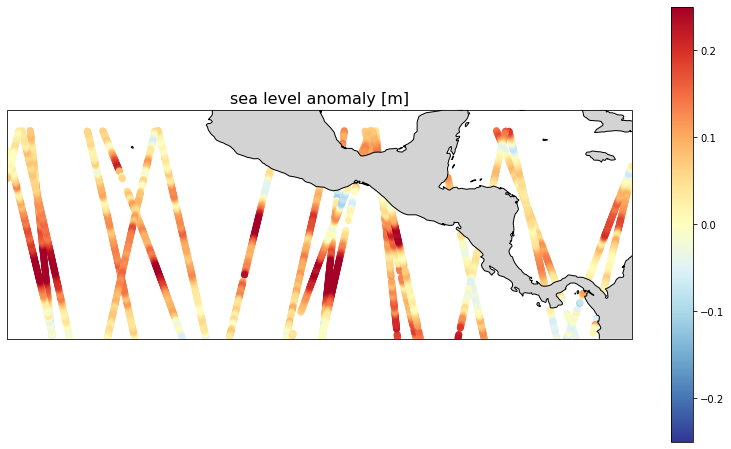

In [11]:
# list all L3 files available in the data/ folder
# for that, we select all the files with "l3" in their name
# NB. the result will be different if you named the previous output with "l3" in the name)
l3_files  = glob.glob(rootPath + '*l3*.nc')
# we sort the list (alphabetically by default) so as to have all files read the one after the other. 
l3_files.sort()

plt.figure()
# plot-frame definition (with high resolution lands)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# iterate over all the names in the list made above, and plot them 
for myl3file in l3_files:
    # print the file name currently being processed on the screen.
    print(myl3file)
    # open file and select data
    mydataset = xarray.load_dataset(myl3file)
    # and select data
    subsetArea = mydataset.sel(time=(mydataset.longitude > lon_min) & (mydataset.longitude < lon_max) & (mydataset.latitude > lat_min) & (mydataset.latitude < lat_max))
    # show the data on the figure
    tracks = ax.scatter(subsetArea['longitude'], subsetArea['latitude'], c=subsetArea['sla_filtered'], vmin=-0.25, vmax=0.25, cmap='RdYlBu_r')
    mydataset.close()

# add colorbar
cbar = plt.colorbar(tracks)
plt.title('sea level anomaly [m]', size=16)
plt.show()

If you are working on a smaller area, you may note that you are seeing less tracks than satellites (and files): some of the satellites would have not measured over that area on that precise day. They may have done so the day before or the day after, or several days before or after, though (or they may never do if the area is really small). This is why the grids are made using up to 6 weeks of data before the date they represent (with a lower weight the earlier they are), and also 6 weeks after for REP files (not possible in near-real time, of course, and explaining in part why we need time to release those higher-precision datasets).

These data may seem complicated to use. However, they do have several advantages:
- first, they are closer to the actual measurements, and you may not want to integrate into your work a gridding process you don't completely control -- there are hypothesis in the gridding process such as correlation time and distances, some filtering, etc. Ocean Circulation models usually assimilate those data, not the gridded ones, since they have their own processes to interpolate the data between measurements.
- second, the processing of the gridded data which is global or regional may not fully fit your area. This is the reason for which we did not examine two of the variables (dac, ocean_tides). Those are corrections of the altimeter heights (NB. they are already applied in the provided Sea level anomalies, see below for all the different corrections applied to an altimeter sea surface height). In some areas, a local tide model can be better than the global one, especially since it involves a good knowledge of bathymetry, not public access everywhere, or very complex in some areas (e.g., the great barrier reef in Australia). 

<img src="./img/ErrorsAltimetry.png">
(Credits Cnes/D. Ducros)

see [How altimetry works](https://www.aviso.altimetry.fr/en/techniques/altimetry/principle/basic-principle.html) on Aviso Altimetry web site for the whole list and the details of each and every correction applied on altimetry data. 

<div class="alert alert-block alert-success">

<b>CONGRATULATIONS</b><br>

***
The Sea Level training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). 